<a href="https://colab.research.google.com/github/martawinter/AcWr2024-25/blob/main/AcWr_Essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive Linguistic Essay: An Analysis of Wikipedia Text on Music 🎼

📘 In this notebook, I will:
1. Scrape an English article from **Wikipedia** using `BeautifulSoup`
2. Use **NLTK** to analyse the linguistic structure
3. Count and visualise **nouns**, **verbs**, **adjectives**, and more
4. Present the results using interactive **Markdown explanations** and **charts**

This project shows how natural language processing (NLP) tools like **NLTK** can help us understand language's structure in real-world texts.

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/Music"
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')

paragraphs = [p.get_text().strip() for p in soup.find_all('p')]
full_text = ' '.join(paragraphs)

print(f"Total characters: {len(full_text)}")
print(full_text[:1000])

Total characters: 76749
 Music is the arrangement of sound to create some combination of form, harmony, melody, rhythm, or otherwise expressive content.[1][2][3] Music is generally agreed to be a cultural universal that is present in all human societies.[4] Definitions of music vary widely in substance and approach.[5] While scholars agree that music is defined by a small number of specific elements, there is no consensus as to what these necessary elements are.[6] Music is often characterized as a highly versatile medium for expressing human creativity.[7] Diverse activities are involved in the creation of music, and are often divided into categories of composition, improvisation, and performance.[8] Music may be performed using a wide variety of musical instruments, including the human voice. It can also be composed, sequenced, or otherwise produced to be indirectly played mechanically or electronically, such as via a music box, barrel organ, or digital audio workstation software on 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

tokens = word_tokenize(full_text)

tokens = [word for word in tokens if word.isalpha()]

pos_tags = pos_tag(tokens)

print(f"Total tokens (words): {len(tokens)}")
print(pos_tags[:15])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Total tokens (words): 11579
[('Music', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('arrangement', 'NN'), ('of', 'IN'), ('sound', 'NN'), ('to', 'TO'), ('create', 'VB'), ('some', 'DT'), ('combination', 'NN'), ('of', 'IN'), ('form', 'NN'), ('harmony', 'NN'), ('melody', 'NN'), ('rhythm', 'NN')]


In [ ]:
from collections import Counter, defaultdict

categories = {
    'Nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verbs': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjectives': ['JJ', 'JJR', 'JJS'],
    'Adverbs': ['RB', 'RBR', 'RBS']
}

pos_counter = Counter()
category_words = defaultdict(list)

for word, tag in pos_tags:
    for category, tag_list in categories.items():
        if tag in tag_list:
            pos_counter[category] += 1
            category_words[category].append(word)

print("Word counts per category:", pos_counter)

Word counts per category: Counter({'Nouns': 4083, 'Verbs': 1659, 'Adjectives': 1306, 'Adverbs': 409})


In [ ]:
for cat, words in category_words.items():
    print(f"\nTop {cat}:")
    for word, count in Counter(words).most_common(10):
        print(f"  {word}: {count}")


Top Nouns:
  music: 432
  instruments: 38
  elements: 32
  century: 32
  songs: 32
  composers: 32
  notes: 29
  song: 29
  Music: 28
  styles: 25

Top Verbs:
  is: 150
  are: 86
  be: 49
  was: 45
  were: 41
  have: 39
  has: 34
  used: 30
  including: 22
  include: 19

Top Adverbs:
  often: 40
  also: 33
  more: 21
  not: 21
  well: 12
  most: 11
  only: 10
  as: 10
  typically: 10
  even: 8

Top Adjectives:
  musical: 78
  such: 75
  classical: 37
  other: 31
  popular: 28
  many: 27
  different: 24
  Western: 21
  common: 18
  traditional: 18


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

/tmp/ipython-input-14-1782644821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(counts), palette="muted")


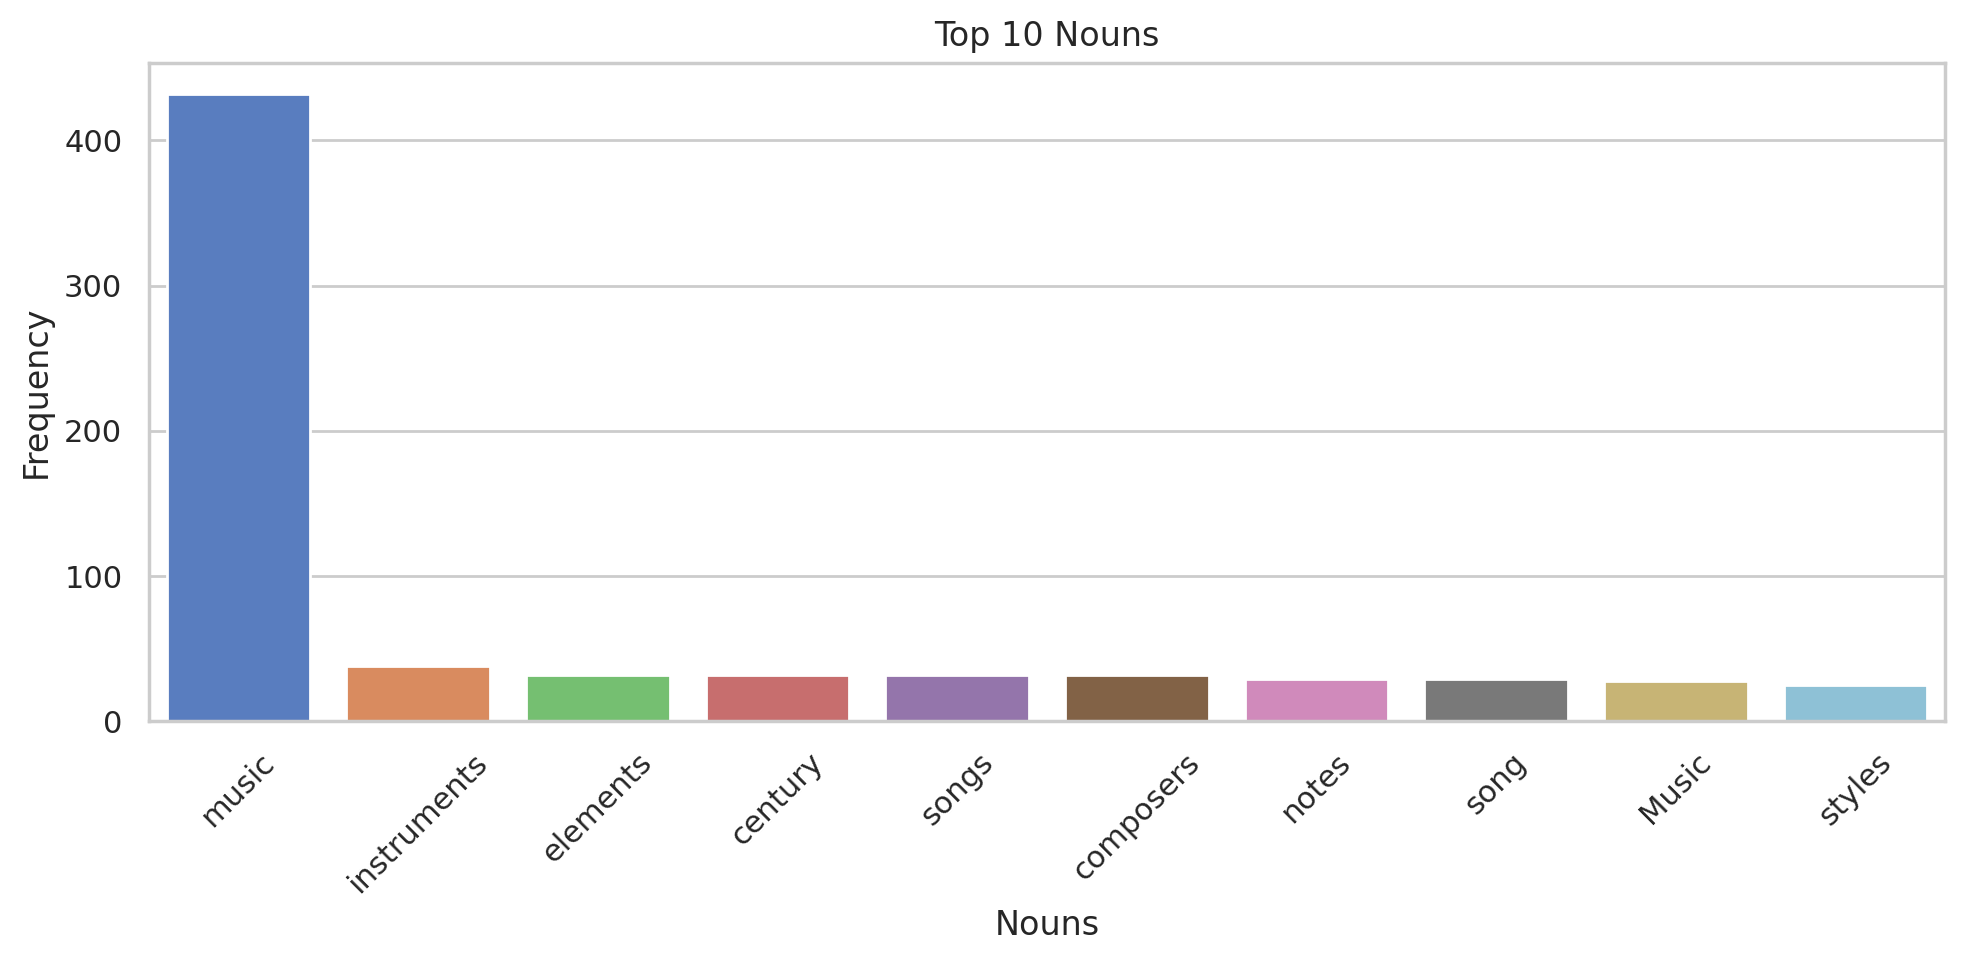

/tmp/ipython-input-14-1782644821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(counts), palette="muted")


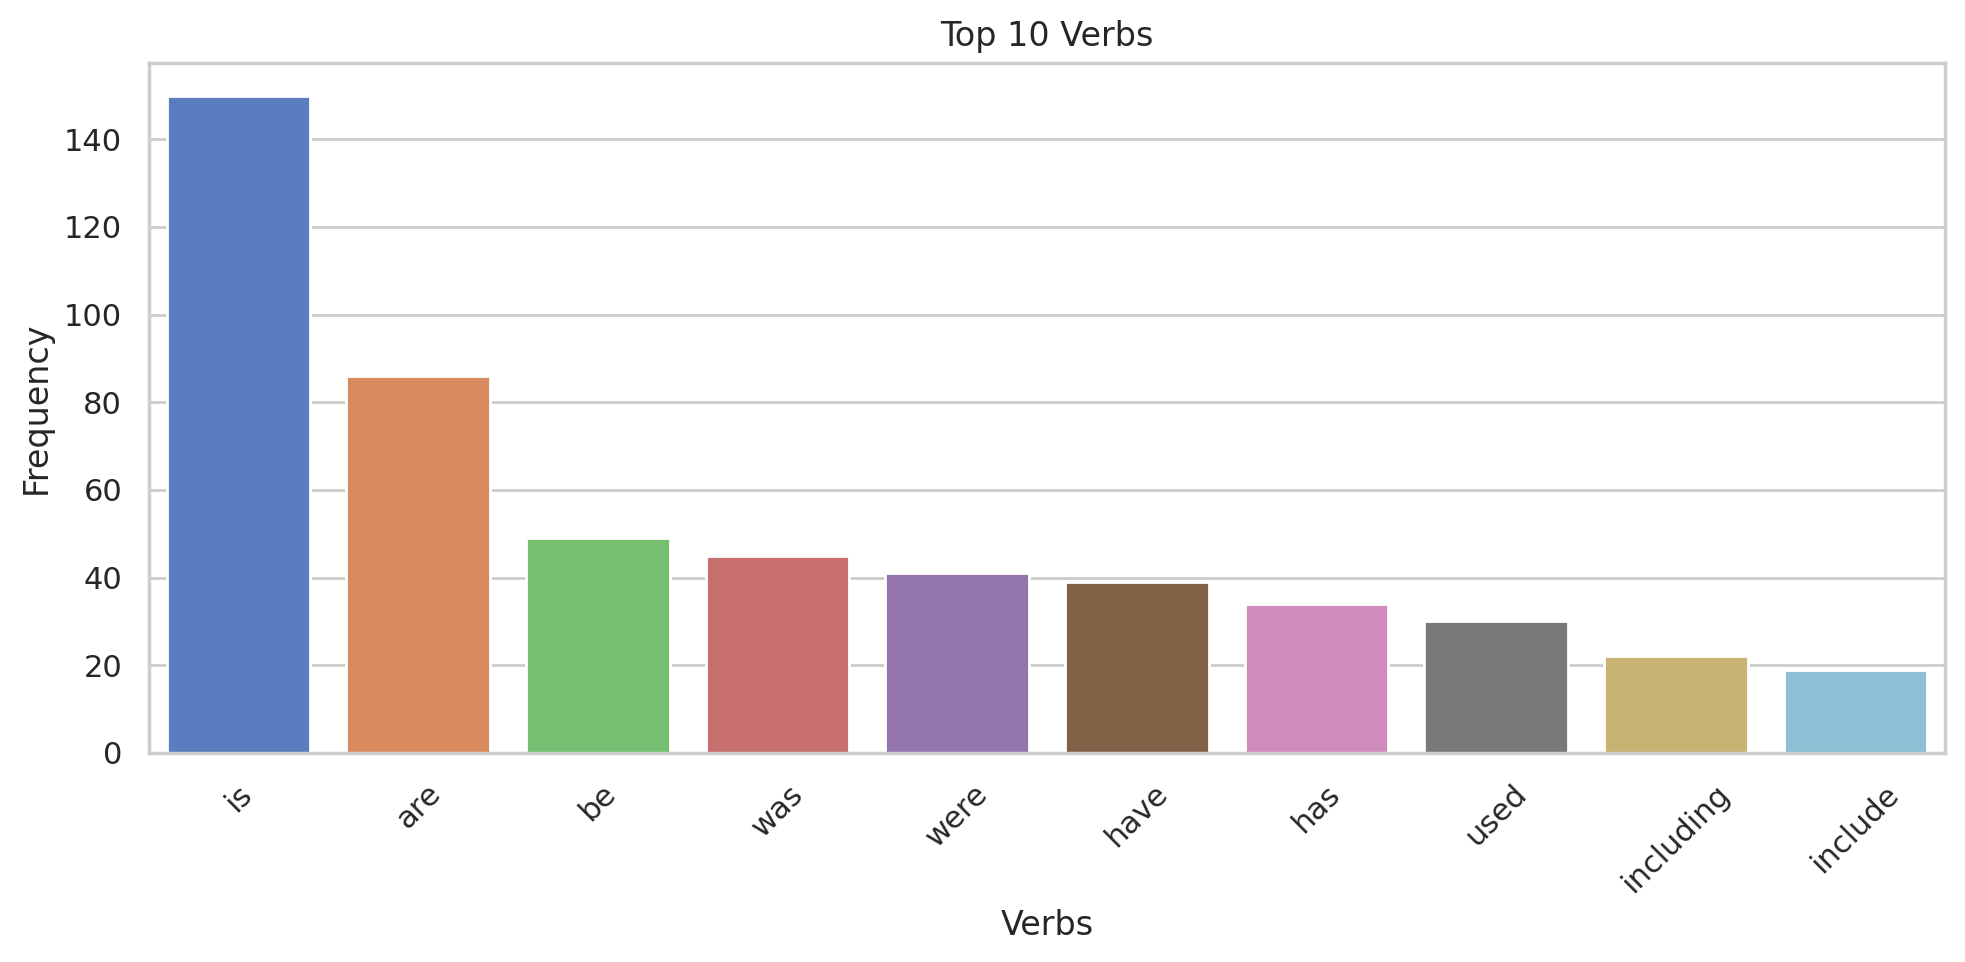

/tmp/ipython-input-14-1782644821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(counts), palette="muted")


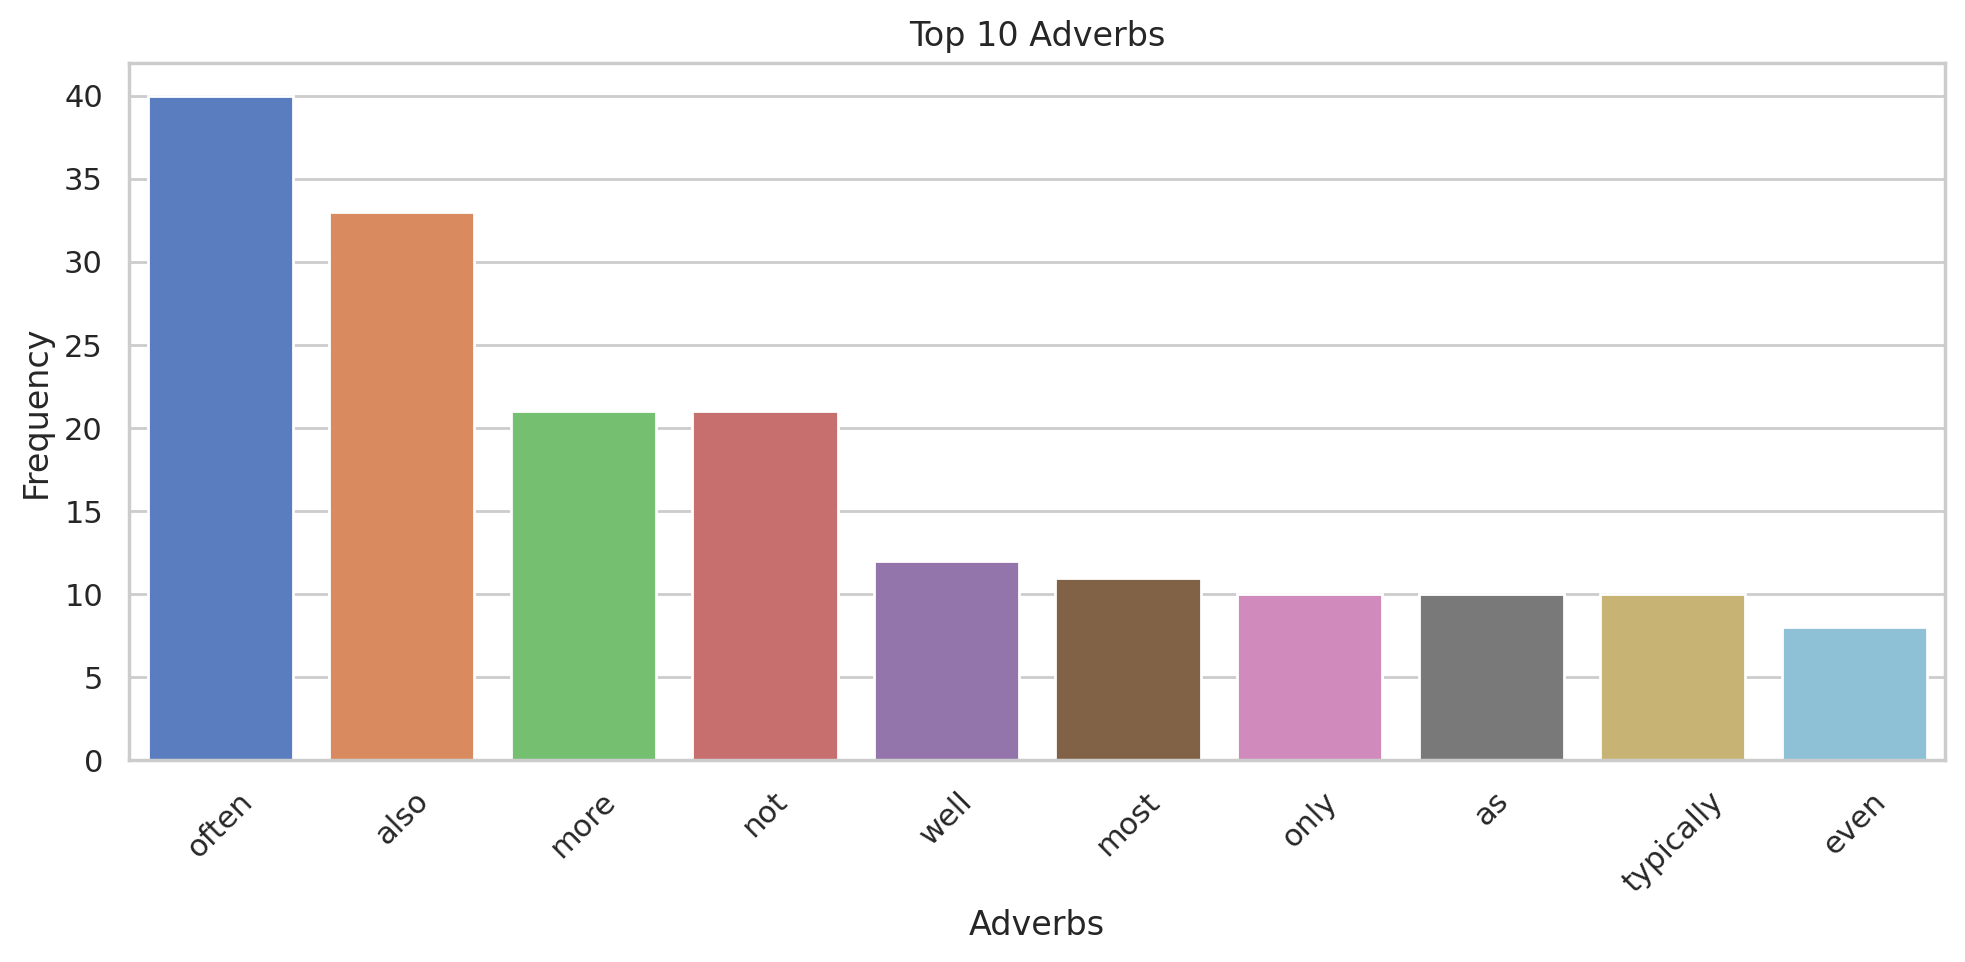

/tmp/ipython-input-14-1782644821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(counts), palette="muted")


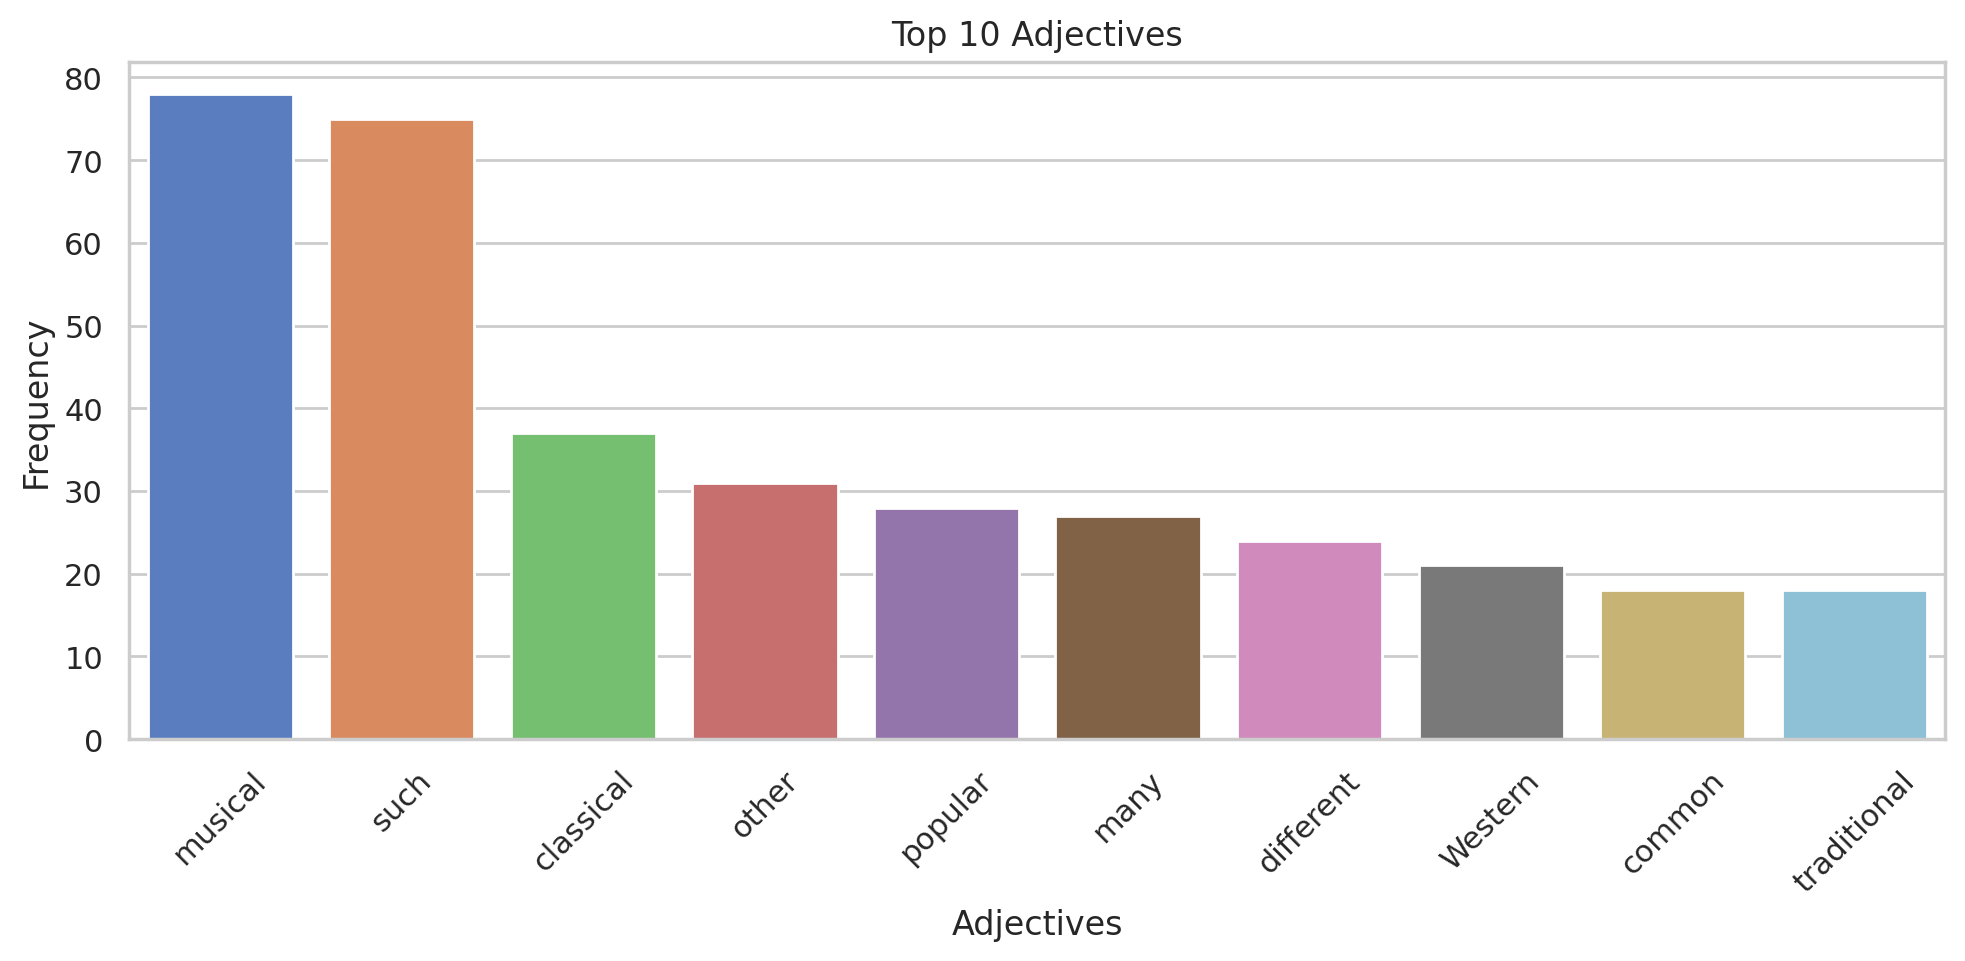

In [14]:
for cat, words in category_words.items():
    top_words = Counter(words).most_common(10)
    labels, counts = zip(*top_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(labels), y=list(counts), palette="muted")
    plt.title(f"Top 10 {cat}")
    plt.ylabel("Frequency")
    plt.xlabel(f"{cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

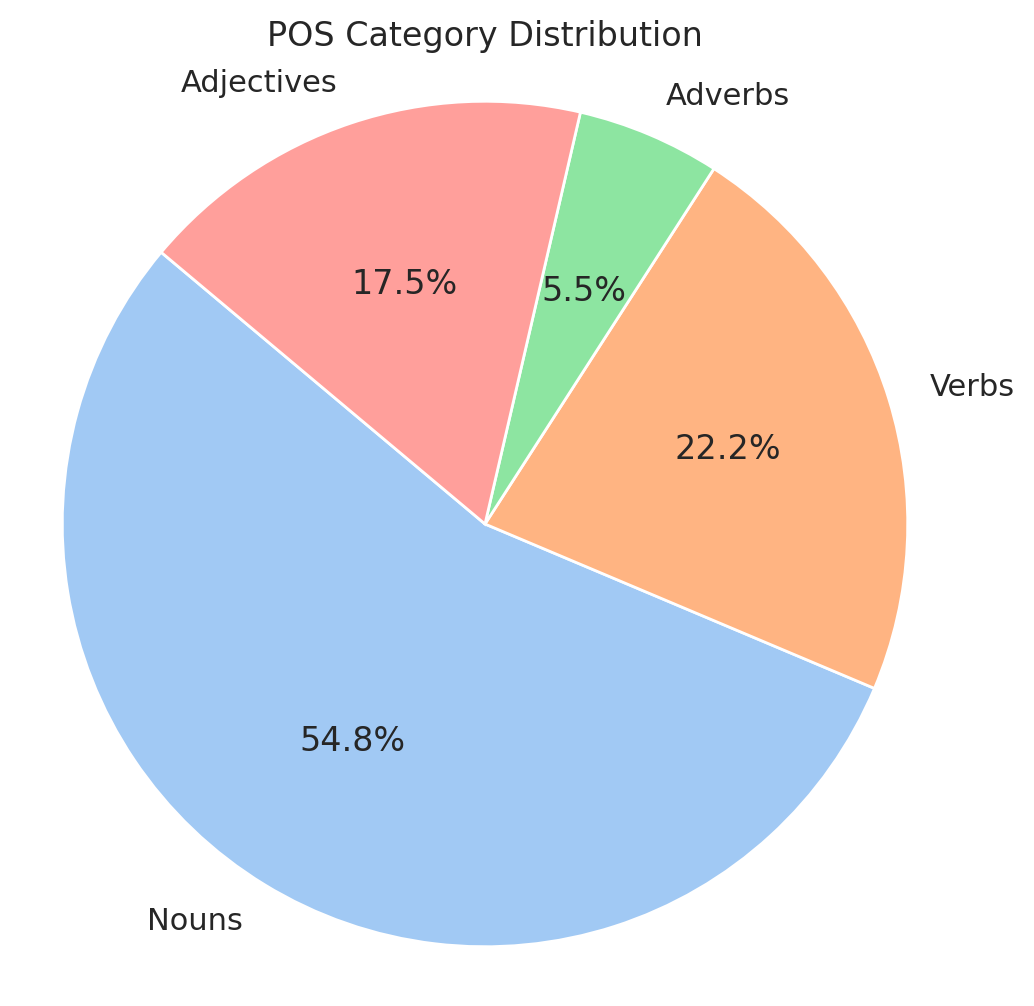

In [16]:
plt.figure(figsize=(6, 6))
labels = pos_counter.keys()
sizes = pos_counter.values()
colors = sns.color_palette("pastel")

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("POS Category Distribution")
plt.axis('equal')
plt.show()

## 📊 Summary and Interpretation

The [Wikipedia article on Music](https://en.wikipedia.org/wiki/Music) was analysed using `nltk` and `BeautifulSoup`.

### 🧩 Results
- **Nouns** dominate the text - expected in an informative article.
- **Verbs** and **adjectives** are used for description and explanation.
- **Adverbs** are less frequent, suggesting objective, factual writing.

### 💡 Linguistic Insight
The POS breakdown reveals how Wikipedia's tone is structured: **noun-heavy, minimally subjective, and focused on facts**.


This notebook combines **NLP**, **data visualisation**, and **linguistic reasoning** - useful for content analysis.